In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

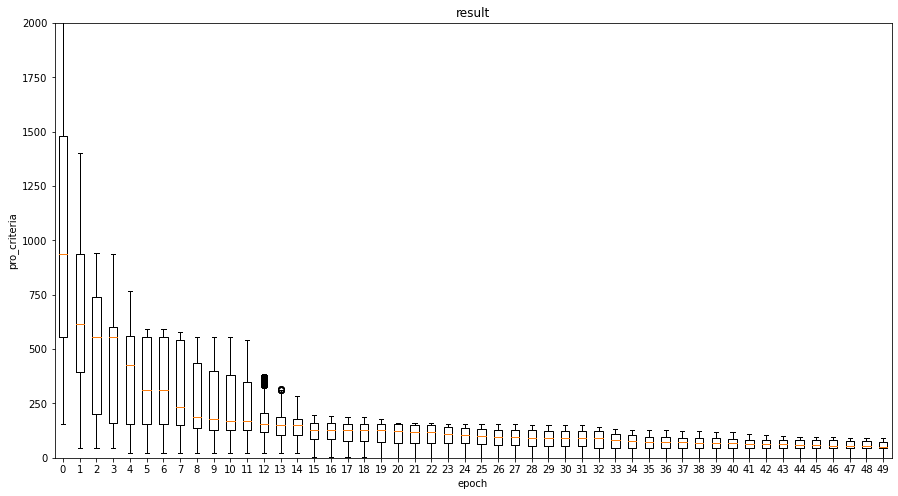

In [2]:

# 初始化一个空列表来存储所有数据
data_list = []
labels = []
medians = []
# 循环遍历 i 的值从 1 到 50
for i in range(0, 50):
    # 构建文件路径
    file_path = f"F:/python/Bayesian_python_ecmodel/gan/gan_output/test{i}/pro_data_{i}.csv"

    # 检查文件是否存在
    if os.path.exists(file_path):
        # 从 CSV 文件中加载数据
        data = pd.read_csv(file_path)
        # 添加到列表中
        data_list.append(data.values.flatten())  # 将数据转换为一维数组
        #medians.append(np.median(data_list))
        labels.append(f"{i}")  # 用于箱线图的标签
    else:
        print(f"文件 {file_path} 不存在.")



# 检查是否有加载的数据
if data_list:
    # 绘制箱线图
    plt.figure(figsize=(15, 8))
    plt.ylim(0,2000)
    #plt.plot(range(1, len(medians) + 1), medians, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=6)
    plt.boxplot(data_list, labels=labels)
    plt.title('result')
    plt.xlabel('epoch')
    plt.ylabel('pro_criteria')
    #plt.xticks(rotation=90)  # 如果标签太多，可以旋转以便阅读
    plt.show()
else:
    print("没有加载到任何数据.")

Compare in pnas' data

In [1]:
from cobra.io import load_matlab_model, read_sbml_model
from cobra import Reaction, Metabolite
import sys
import os
path = "F:\python\Bayesian_python_ecmodel"
os.chdir(path)
import matplotlib.pyplot as plt
import seaborn as sns
import cobra
import scipy.io as scio
# import self function
from src.mainFunction import *
from src.protein_process import *
from src.model_process import *
from src.constrain_ecmodel import *
from src.ec_N_lim_sen import *

In [2]:
#load the dl_model
enzymedataFile = "data/model/Saccharomyces_cerevisiae_dl.mat"
z = scio.loadmat(enzymedataFile)
model = z['model'][0,0]
enzymedata = z['enzymedata'][0,0]
#scio.savemat('data/model/model.mat', {'model': model})
model_cobra = load_matlab_model('data/model/model.mat')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-26


No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, ce, e, er, erm, g, gm, lp, m, mm, n, p, v, vm


In [4]:
#construnct ecModel
enzymedata = z['enzymedata'][0,0]
MWs = construct_MWs(enzymedata)
kcat_dict = construct_kcat_dict(model,enzymedata)
eModel_initial = convertToEnzymeModel(model_cobra,kcat_dict)
eModel_initial = constrainPool(eModel_initial, MWs, {}, eModel_initial.enzymes, 230)
s2 = get_r_max(eModel_initial,model_cobra)

Number of enzymes: 1131
Read LP format model from file C:\Users\sherr\AppData\Local\Temp\tmplj5lx0p2.lp
Reading time = 0.06 seconds
: 3873 rows, 14678 columns, 59128 nonzeros


Maximize
0


In [5]:
#construnct ecModel
#kcat_tmp = pd.read_csv("data/kcat_genra4.txt",delimiter=",",header=None)
kcat_tmp = pd.read_csv("data/kcat_genra100.txt",delimiter=",",header=None)
kcat_tmp = np.array(kcat_tmp)
kcat_100 = kcat_tmp[0:-2,:]
[a,b] = updateprior(kcat_100)
enzymedata['kcat'] = np.transpose(a)
enzymedata['kcat_var'] = np.transpose(b)
MWs = construct_MWs(enzymedata)
kcat_dict = construct_kcat_dict(model,enzymedata)
eModel_bayesian = convertToEnzymeModel(model_cobra,kcat_dict)
eModel_bayesian = constrainPool(eModel_bayesian, MWs, {}, eModel_bayesian.enzymes, 230)
s2 = get_r_max(eModel_bayesian,model_cobra)

Number of enzymes: 1131
Read LP format model from file C:\Users\sherr\AppData\Local\Temp\tmpmixf0jhv.lp
Reading time = 0.16 seconds
: 3873 rows, 14678 columns, 59128 nonzeros


In [6]:
    enzyme_preparation = pd.read_csv ('data/merged_data.csv')
    kcat_df = pd.DataFrame (list (kcat_dict.items ()) , columns=['gene_rxnID' , 'kcat_value'])
    kcat_df[['gene' , 'rxnID']] = pd.DataFrame (kcat_df['gene_rxnID'].tolist () , index=kcat_df.index)
    merged_df = pd.merge (enzyme_preparation , kcat_df , on=['gene' , 'rxnID'])
    kcat_final = merged_df[['gene' , 'rxnID' , 'kcat_value']]
    print(kcat_final)

       gene         rxnID    kcat_value
0   YJR048W      r_0001_2  7.826268e+03
1   YJR048W      r_0002_2  2.763305e+03
2   YCR034W      r_0005_3  1.089534e+05
3   YDR127W        r_0039  3.779265e+04
4   YHR163W      r_0091_2  1.725324e+04
5   YOR374W        r_0176  6.115438e+03
6   YPL271W      r_0226_1  5.781961e+06
7   YLR304C    r_0280_rvs  2.054705e+05
8   YLR304C    r_0302_rvs  7.561961e+06
9   YJR048W      r_0437_2  2.764166e+05
10  YJR048W      r_0438_3  1.719663e+06
11  YDR231C      r_0438_5  1.714949e+06
12  YBL045C      r_0439_1  6.166289e+04
13  YNL277W        r_0549  1.641349e+04
14  YNL037C        r_0658  3.586204e+04
15  YLR174W    r_0659_fwd  3.772728e+04
16  YJR148W    r_0663_fwd  2.757229e+04
17  YLR027C        r_0681  2.821697e+05
18  YLL041C  r_1021_1_fwd  3.861137e+04
19  YDR178W  r_1021_1_rvs  2.492914e+04
20  YDR178W  r_1021_2_fwd  7.984685e+04
21  YKL141W  r_1021_2_fwd  7.984685e+04
22  YKL141W  r_1021_2_rvs  5.643475e+04
23  YLL041C  r_1021_3_fwd  1.891131e+04


In [25]:
kcat_new_value

array([1.31726770e+01, 1.39980550e+06, 4.17234188e+05, 1.25347891e+01,
       1.60654182e+01, 1.45691185e+01, 2.02724688e+06, 2.02465312e+06,
       1.63979312e+06, 1.59937812e+06, 3.81389648e+02, 2.36735922e+05,
       1.58957238e+06, 1.95566812e+06, 1.67643032e+01, 3.42208719e+05,
       1.83936703e+05, 2.00880512e+06, 1.98375125e+06, 1.45737228e+01,
       2.02521550e+06, 1.87738062e+06, 1.58191212e+06, 3.64042422e+04,
       1.65762250e+06, 1.99623425e+06, 1.34587021e+01, 8.76715438e+05,
       1.55877390e+01, 6.07437031e+04, 1.74224670e+03, 1.86596375e+05,
       1.50080412e+06, 1.60082725e+06, 1.69419956e+01, 1.39840612e+06,
       4.53922363e+03, 9.70807891e+04, 2.59483516e+05, 7.32399438e+05],
      dtype=float32)

In [7]:
from src.ec_N_lim_sen import updateEcGEMkcat
#kcat_new = pd.read_csv ('/merged_data.csv')
kcat_new = np.load("F:/python/Bayesian_python_ecmodel/gan/gan_output/test49/repeat_0/490_r.npy")
kcat_new = np.exp(kcat_new)
kcat_new_value = np.mean(kcat_new,axis=0)
kcat_df_new = pd.DataFrame(kcat_new_value)
column_names = ['kcat_value0']
kcat_df_new.columns = column_names
rxn_name = enzyme_preparation.drop(['kcat_value1'],axis=1,inplace=False)
kcat_final_tmp = pd.concat ([rxn_name, kcat_df_new] , axis=1)
index = 'kcat_value0'
with eModel_bayesian as model_tmp:
    #model_tmp = constrainPool(model_tmp, MWs, {}, model_tmp.enzymes, 230)
    #s2 = get_r_max(model_tmp,model_cobra)
    for k in range (len (kcat_final_tmp)):
        target_gene0 = kcat_final_tmp['gene'][k]
        kcat_m0 = kcat_final_tmp[index][k]
        rxn0 = kcat_final_tmp['rxnID'][k]
        model_tmp = updateEcGEMkcat (ecModel=model_tmp ,target_gene=target_gene0 ,rxnID=rxn0 ,kcat_m=kcat_m0)
    eModel_gan = model_tmp.copy()

Read LP format model from file C:\Users\sherr\AppData\Local\Temp\tmp2vz3yltq.lp
Reading time = 0.05 seconds
: 3874 rows, 14680 columns, 61392 nonzeros


In [40]:
ecmodel_re = read_sbml_model("F:/2022/SJTU/De-novo-protein-3D-structure-yeast/ecYeast_DL_update_some_kcat.xml")

In [22]:
print(ecmodel_re.reactions)

[<Reaction r_0001_1 at 0x24d7fad7100>, <Reaction r_0001_2 at 0x24d7fad7a60>, <Reaction r_0001_3 at 0x24d7fad7fd0>, <Reaction r_0001_4 at 0x24d7fae7580>, <Reaction r_0002_1 at 0x24d7fae7880>, <Reaction r_0002_2 at 0x24d7fae7b80>, <Reaction r_0003_fwd at 0x24d7fae7e80>, <Reaction r_0003_rvs at 0x24d7fae7d00>, <Reaction r_0004_1 at 0x24d7fae7e50>, <Reaction r_0004_2 at 0x24d7fae7ee0>, <Reaction r_0005_1 at 0x24d7faf0820>, <Reaction r_0005_2 at 0x24d7faf0be0>, <Reaction r_0005_3 at 0x24d7faf08e0>, <Reaction r_0006_1 at 0x24d7faf0fa0>, <Reaction r_0006_2 at 0x24d7faf0e80>, <Reaction r_0007 at 0x24d7faf0a60>, <Reaction r_0012 at 0x24d7faf0ee0>, <Reaction r_0013 at 0x24d7faf8820>, <Reaction r_0014 at 0x24d7faf8a60>, <Reaction r_0015 at 0x24d7faf8d00>, <Reaction r_0016_1 at 0x24d7faf8dc0>, <Reaction r_0016_2 at 0x24d7faf8e20>, <Reaction r_0017 at 0x24d7faf8fd0>, <Reaction r_0018_1_fwd at 0x24d7fad7d90>, <Reaction r_0018_1_rvs at 0x24d7fb04970>, <Reaction r_0018_2_fwd at 0x24d7fb04b50>, <Reacti

Read LP format model from file C:\Users\sherr\AppData\Local\Temp\tmpvw4vmfzj.lp
Reading time = 0.03 seconds
: 3893 rows, 14718 columns, 61468 nonzeros
growth rate:  0.08409871417746692
Protein_pool:  1000.0
0.5380187522060417
-18.165258077655746
Glucose uptake rate:  -18.165258077655746
-190.28352247702122
-18.165439730236525
Mutiple protein have one abudance value! Need quality check.
56 gene     YBR009C; YNL030W
g/gDW            0.000348
Name: 56, dtype: object
63 gene     YPR080W; YBR118W
g/gDW            0.020647
Name: 63, dtype: object
276 gene     YKR059W; YJL138C
g/gDW            0.001259
Name: 276, dtype: object
890 gene     YOR133W; YDR385W
g/gDW            0.004732
Name: 890, dtype: object
2808 gene     YBR010W; YNL031C
g/gDW            0.000498
Name: 2808, dtype: object
Complete the quality check!
Correlation coefficient: 0.38256727214672226
Correlation p_value: 9.837707195274577e-13


D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


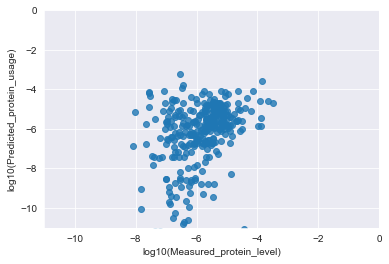

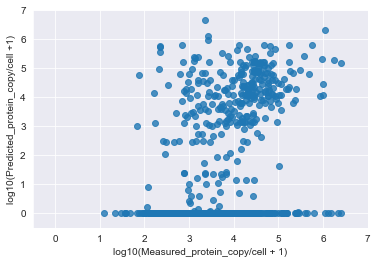

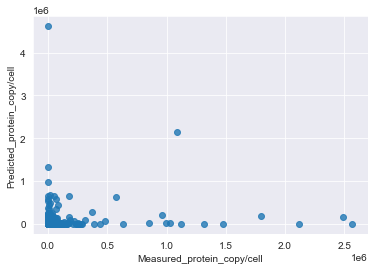

In [24]:
#without proteomic data (initial version)
with ecmodel_re:
    ecModel = ecmodel_re.copy()
    #s2 = get_r_max(ecModel,model_cobra)
    print("growth rate: ", s2.objective_value)
    print("Protein_pool: ", ecModel.reactions.get_by_id("EX_protein_pool").upper_bound)
    ##ecModel = eModel_gan
    #cobra.io.write_sbml_model (ecModel , "data/ecModel.xml")

    ex_mets = ['biomass pseudoreaction' , 'D-glucose exchange' , 'acetate exchange' , 'ethanol exchange' ,
               'glycerol exchange' , 'pyruvate exchange' , 'ethyl acetate exchange' , 'carbon dioxide exchange' ,
               'oxygen exchange' , 'EX_protein_pool']
    # find the related rxnID
    idx = []
    for name0 in ex_mets:
        # print(name0)
        s = getRxnByReactionName (model=ecModel , name=name0)
        if len (s) > 1:
            print ("need check")
        elif len (s)==1:
            idx.append (s[0])

    # model_tmp = ecModel.copy() # this is adjusted for the newly added constraints from organelle
    dilutionrate = 0.42
    with ecModel as model_tmp:
        model_tmp.reactions.r_1714.lower_bound = -20
        model_tmp.reactions.r_1634.lower_bound = 0.566
        model_tmp.reactions.r_1761.lower_bound = 27
        model_tmp.reactions.r_1808.lower_bound = 1.469
        print (model_tmp.optimize ().objective_value)
        # model_tmp.reactions.get_by_id(idx[1]).lower_bound = -1000  # glucose uptake
        model_tmp.reactions.get_by_id (idx[0]).lower_bound = dilutionrate
        model_tmp.objective = {model_tmp.reactions.r_1714: 1}  # minimize the uptake of glucose
        solution2 = model_tmp.optimize ()
        print (solution2.objective_value)
        # then fix glucose uptake and minimize the protein pool
        model_tmp.reactions.get_by_id (idx[1]).lower_bound = solution2.objective_value * 1.00001
        print ('Glucose uptake rate: ' , solution2.objective_value)
        model_tmp.reactions.get_by_id (idx[9]).lower_bound = -1000  # protein pool
        model_tmp.objective = {model_tmp.reactions.EX_protein_pool: 1}  # minimize the usage of protein pools
        solution_f = model_tmp.optimize ()
        print (solution_f.fluxes["EX_protein_pool"])
        print (solution_f.fluxes["r_1714"])

        flux_max = solution_f.fluxes
        result = pd.DataFrame ({'rxnID': flux_max.index , 'flux': flux_max.values})
        result = result[result['rxnID'].str.contains ("prot_")]
        result['geneID'] = result['rxnID'].str.replace ("prot_" , "")
        # input the proteomics under max growth rate
        abundance_ex = pd.read_excel ("data/proteomics/data_PNAS_2021.xlsx")
        abundance_ex['g/gDW'] = (abundance_ex['replicate 1 (g gDW-1)'] + abundance_ex['replicate 2 (g gDW-1)'] +
                                 abundance_ex['replicate 3 (g gDW-1)']) / 3
        abundance_ex = abundance_ex[['Symbol' , 'g/gDW']]
        abundance_ex.columns = ['gene' , 'g/gDW']
        abundance_ex1 = splitAbundance (pro_df=abundance_ex)
        # change the unit from g/gDW as mmol/gDW
        # input the molecular weight
        mw = pd.read_csv ("data/sce_protein_weight.tsv" , sep="\t")
        mw = mw[["locus" , "proteins_molecular_weight"]]
        mw.columns = ["gene name" , "MW"]
        mw["MW_Kda"] = mw["MW"] / 1000
        abundance_ex1["MW_Kda"] = singleMapping (mw["MW_Kda"] , mw["gene name"] , abundance_ex1["gene"])
        abundance_ex_check = abundance_ex1[abundance_ex1["MW_Kda"].isna ()]
        abundance_ex1 = abundance_ex1[~abundance_ex1["MW_Kda"].isna ()]
        abundance_ex1["mmol/gDW"] = abundance_ex1["g/gDW"] / abundance_ex1["MW_Kda"]  # #mmol/g biomass

        result['pro_measured'] = singleMapping (abundance_ex1["mmol/gDW"] , abundance_ex1["gene"] , result['geneID'])
        result = result[~result["pro_measured"].isna ()]
        result.to_excel ("data/data_check.xlsx")

        # change the protein abundance unit from mmol/gDW into protein copy/cell
        coefficient1 = 7.8298e9
        result_unify = result.copy ()
        result_unify["pro_measured"] = result['pro_measured'] * coefficient1
        result_unify["flux"] = result['flux'] * coefficient1

        import seaborn as sns
        import matplotlib.pyplot as plt
        import numpy as np
        from scipy.stats import pearsonr

        # method1 absolute protein abundance mmol protein/gDW
        plt.figure ()
        sns.regplot (x=np.log10 (result['pro_measured']) , y=np.log10 (result['flux']) , fit_reg=False)
        plt.xlim (-11 , 0)
        plt.ylim (-11 , 0)
        plt.xlabel ("log10(Measured_protein_level)")
        plt.ylabel ("log10(Predicted_protein_usage)")

        from scipy.stats import pearsonr

        result1 = result[result['flux'] > 0]
        result1 = result1[result1['pro_measured'] > 0]
        corr , ss = pearsonr (np.log10 (result1['pro_measured']) , np.log10 (result1['flux']))
        print ("Correlation coefficient:" , corr)
        print ("Correlation p_value:" , ss)

        # method2 protein copy/cell
        plt.figure ()
        sns.regplot (x=np.log10 (result_unify['pro_measured'] + 1) , y=np.log10 (result_unify['flux'] + 1) ,
                     fit_reg=False)
        plt.xlim (-0.5 , 7)
        plt.ylim (-0.5 , 7)
        plt.xlabel ("log10(Measured_protein_copy/cell + 1)")
        plt.ylabel ("log10(Predicted_protein_copy/cell +1)")

        plt.figure ()
        sns.regplot (x=result_unify['pro_measured'] , y=result_unify['flux'] , fit_reg=False)
        plt.xlabel ("Measured_protein_copy/cell")
        plt.ylabel ("Predicted_protein_copy/cell")

In [20]:
#without proteomic data (initial version)
with ecmodel_re:
    ecModel = ecmodel_re.copy()
    #s2 = get_r_max(ecModel,model_cobra)
    print("growth rate: ", s2.objective_value)
    print("Protein_pool: ", ecModel.reactions.get_by_id("prot_pool_exchange").upper_bound)
    ##ecModel = eModel_gan
    #cobra.io.write_sbml_model (ecModel , "data/ecModel.xml")

    ex_mets = ['biomass pseudoreaction' , 'D-glucose exchange' , 'acetate exchange' , 'ethanol exchange' ,
               'glycerol exchange' , 'pyruvate exchange' , 'ethyl acetate exchange' , 'carbon dioxide exchange' ,
               'oxygen exchange' , 'prot_pool_exchange']
    # find the related rxnID
    idx = []
    for name0 in ex_mets:
        # print(name0)
        s = getRxnByReactionName (model=ecModel , name=name0)
        if len (s) > 1:
            print ("need check")
        elif len (s)==1:
            idx.append (s[0])

    # model_tmp = ecModel.copy() # this is adjusted for the newly added constraints from organelle
    dilutionrate = 0.42
    with ecModel as model_tmp:
        model_tmp.reactions.r_1714.lower_bound = -20
        model_tmp.reactions.r_1634.lower_bound = 0.566
        model_tmp.reactions.r_1761.lower_bound = 27
        model_tmp.reactions.r_1808.lower_bound = 1.469
        print (model_tmp.optimize ().objective_value)
        # model_tmp.reactions.get_by_id(idx[1]).lower_bound = -1000  # glucose uptake
        model_tmp.reactions.get_by_id (idx[0]).lower_bound = dilutionrate
        model_tmp.objective = {model_tmp.reactions.r_1714: 1}  # minimize the uptake of glucose
        solution2 = model_tmp.optimize ()
        print (solution2.objective_value)
        # then fix glucose uptake and minimize the protein pool
        model_tmp.reactions.get_by_id (idx[1]).lower_bound = solution2.objective_value * 1.00001
        print ('Glucose uptake rate: ' , solution2.objective_value)
        model_tmp.reactions.get_by_id (idx[9]).lower_bound = -1000  # protein pool
        model_tmp.objective = {model_tmp.reactions.prot_pool_exchange: 1}  # minimize the usage of protein pools
        solution_f = model_tmp.optimize ()
        print (solution_f.fluxes["prot_pool_exchange"])
        print (solution_f.fluxes["r_1714"])

        flux_max = solution_f.fluxes
        result = pd.DataFrame ({'rxnID': flux_max.index , 'flux': flux_max.values})
        result = result[result['rxnID'].str.contains ("prot_")]
        result['geneID'] = result['rxnID'].str.replace ("draw_prot_" , "")
        # input the proteomics under max growth rate
        abundance_ex = pd.read_excel ("data/proteomics/data_PNAS_2021.xlsx")
        abundance_ex['g/gDW'] = (abundance_ex['replicate 1 (g gDW-1)'] + abundance_ex['replicate 2 (g gDW-1)'] +
                                 abundance_ex['replicate 3 (g gDW-1)']) / 3
        abundance_ex = abundance_ex[['Symbol' , 'g/gDW']]
        abundance_ex.columns = ['gene' , 'g/gDW']
        abundance_ex1 = splitAbundance (pro_df=abundance_ex)
        # change the unit from g/gDW as mmol/gDW
        # input the molecular weight
        mw = pd.read_csv ("data/sce_protein_weight.tsv" , sep="\t")
        mw = mw[["locus" , "proteins_molecular_weight"]]
        mw.columns = ["gene name" , "MW"]
        mw["MW_Kda"] = mw["MW"] / 1000
        abundance_ex1["MW_Kda"] = singleMapping (mw["MW_Kda"] , mw["gene name"] , abundance_ex1["gene"])
        abundance_ex_check = abundance_ex1[abundance_ex1["MW_Kda"].isna ()]
        abundance_ex1 = abundance_ex1[~abundance_ex1["MW_Kda"].isna ()]
        abundance_ex1["mmol/gDW"] = abundance_ex1["g/gDW"] / abundance_ex1["MW_Kda"]  # #mmol/g biomass

        result['pro_measured'] = singleMapping (abundance_ex1["mmol/gDW"] , abundance_ex1["gene"] , result['geneID'])
        result = result[~result["pro_measured"].isna ()]
        result.to_excel ("data/data_check.xlsx")

        # change the protein abundance unit from mmol/gDW into protein copy/cell
        coefficient1 = 7.8298e9
        result_unify = result.copy ()
        result_unify["pro_measured"] = result['pro_measured'] * coefficient1
        result_unify["flux"] = result['flux'] * coefficient1

        import seaborn as sns
        import matplotlib.pyplot as plt
        import numpy as np
        from scipy.stats import pearsonr

        # method1 absolute protein abundance mmol protein/gDW
        plt.figure ()
        sns.regplot (x=np.log10 (result['pro_measured']) , y=np.log10 (result['flux']) , fit_reg=False)
        plt.xlim (-11 , 0)
        plt.ylim (-11 , 0)
        plt.xlabel ("log10(Measured_protein_level)")
        plt.ylabel ("log10(Predicted_protein_usage)")

        from scipy.stats import pearsonr

        result1 = result[result['flux'] > 0]
        result1 = result1[result1['pro_measured'] > 0]
        corr , ss = pearsonr (np.log10 (result1['pro_measured']) , np.log10 (result1['flux']))
        print ("Correlation coefficient:" , corr)
        print ("Correlation p_value:" , ss)

        # method2 protein copy/cell
        plt.figure ()
        sns.regplot (x=np.log10 (result_unify['pro_measured'] + 1) , y=np.log10 (result_unify['flux'] + 1) ,
                     fit_reg=False)
        plt.xlim (-0.5 , 7)
        plt.ylim (-0.5 , 7)
        plt.xlabel ("log10(Measured_protein_copy/cell + 1)")
        plt.ylabel ("log10(Predicted_protein_copy/cell +1)")

        plt.figure ()
        sns.regplot (x=result_unify['pro_measured'] , y=result_unify['flux'] , fit_reg=False)
        plt.xlabel ("Measured_protein_copy/cell")
        plt.ylabel ("Predicted_protein_copy/cell")

Read LP format model from file C:\Users\sherr\AppData\Local\Temp\tmphtmzhhw4.lp
Reading time = 0.03 seconds
: 3893 rows, 14718 columns, 61468 nonzeros
growth rate:  0.08409871417746692


KeyError: 'prot_pool_exchange'

In [28]:
fold = result1['pro_measured']/result1['flux']
result2 = result1[fold>10]
fold[fold>100].sum()

4657214.032138231

In [10]:
fold = result1['pro_measured']/result1['flux']
result2 = result1[fold>100]
result1

,rxnID,flux,geneID,pro_measured
6208,draw_prot_YAR015W,7.578860e-07,YAR015W,8.816919e-06
6209,draw_prot_YBR248C,5.183248e-06,YBR248C,1.839911e-06
6215,draw_prot_YLR043C,9.143215e-07,YLR043C,6.349784e-06
6216,draw_prot_YOR335C,3.219355e-06,YOR335C,4.911238e-06
6217,draw_prot_YKL182W,1.725333e-06,YKL182W,5.202776e-06
...,...,...,...,...
7329,draw_prot_YHR074W,2.404145e-06,YHR074W,3.609089e-07
7334,draw_prot_YLR303W,1.314221e-06,YLR303W,1.268520e-04
7336,draw_prot_YLR438W,1.353202e-06,YLR438W,3.471196e-07
7337,draw_prot_YER052C,1.013200e-07,YER052C,4.652305e-06


In [16]:
fold = result1['pro_measured']/result1['flux']
result2 = result1[fold>100]
result1

,rxnID,flux,geneID,pro_measured
6208,draw_prot_YAR015W,7.578860e-07,YAR015W,8.816919e-06
6209,draw_prot_YBR248C,5.183248e-06,YBR248C,1.839911e-06
6215,draw_prot_YLR043C,9.143215e-07,YLR043C,6.349784e-06
6216,draw_prot_YOR335C,3.219355e-06,YOR335C,4.911238e-06
6217,draw_prot_YKL182W,1.725333e-06,YKL182W,5.202776e-06
...,...,...,...,...
7329,draw_prot_YHR074W,2.404145e-06,YHR074W,3.609089e-07
7334,draw_prot_YLR303W,1.314221e-06,YLR303W,1.268520e-04
7336,draw_prot_YLR438W,1.353202e-06,YLR438W,3.471196e-07
7337,draw_prot_YER052C,1.067506e-07,YER052C,4.652305e-06


Correlation coefficient: 0.4789763280872562
Correlation p_value: 6.665919083213555e-14


Text(0, 0.5, 'log10(Predicted_protein_usage)')

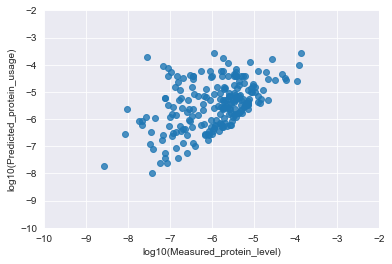

In [19]:
        fold = result1['pro_measured']/result1['flux']
        #fold[fold>100]
        result2 = result1[fold<5]
        #result2 = result1[result1['pro_measured'] > 0]
        corr , ss = pearsonr (np.log10 (result2['pro_measured']) , np.log10 (result2['flux']))
        print ("Correlation coefficient:" , corr)
        print ("Correlation p_value:" , ss)
                # method1 absolute protein abundance mmol protein/gDW
        plt.figure ()
        sns.regplot (x=np.log10 (result2['pro_measured']) , y=np.log10 (result2['flux']) , fit_reg=False)
        plt.xlim (-10 , -2)
        plt.ylim (-10 , -2)
        plt.xlabel ("log10(Measured_protein_level)")
        plt.ylabel ("log10(Predicted_protein_usage)")

In [29]:
fold = result1['pro_measured']/result1['flux']
fold[fold>100]

6220      9617.910775
6228       991.063152
6263       102.083706
6284    579110.081531
6301       248.435087
6302      2350.146921
6325      2233.510083
6336       288.351749
6362      4775.084429
6385       329.326165
6397       834.409823
6530     46999.876583
6547     98901.721410
6659      1915.535607
6690       216.006959
6719     17311.080021
6757       188.052912
6766      1269.270014
6804    525899.463163
6834      1873.638485
6878       303.359828
6901       489.529275
6908       504.234459
6924     10649.587049
6931       282.430578
6945       252.387646
6964    155482.148164
6982       954.972207
6993       226.590016
7032       583.348754
7041       164.997800
7052      8634.877910
7065       122.254568
7067      7724.195221
7092      8750.843608
7124       829.109873
7156       592.543311
7161      1428.702754
7224      3862.000241
7269     17449.459198
dtype: float64

In [14]:
from src.ec_N_lim_sen import abc_python_max
#growth data
growthdata = pd.read_csv('data/proteomics_test.csv')
growthdata = growthdata.drop(columns=['qNitrogen (mmol/gDW h)'])
growthdata = np.array(growthdata)
growthdata_test = growthdata[0:7] #NH4+

D = abc_python_max (model , eModel_gan , growthdata_test , 1 , 1 , rxn2block)[0]
D = D[0][0]
D_100 = D
theta_100 = []
kcat_100 = []
sampledgeneration = 1

nstep:1/1
No. 1finish !
No. 2finish !
No. 3finish !
No. 4finish !
No. 5finish !
No. 6finish !
No. 7finish !
RMSE = 2.845950952101586
execution time:  8.187796115875244  seconds
rmse_final is  [[2.84595095]]


In [42]:
for j in range(1) :
    #if j % 100 == 0:
    print(f'current set processed: {j}')
    index = 'kcat_value'+str(j)
    with ecmodel_re as model_tmp:
        for i in range(len(growthdata_test)) :
            dilutionrate = growthdata_test[i,0]

            model_tmp = changeMedia (model , model_tmp , 'D-glucose' , "MIN")
            #model_tmp.reactions.get_by_id ('r_1634').bounds = 0 , 0
            model_tmp.reactions.get_by_id ('r_1631').bounds = 0 , 0
            model_tmp.reactions.get_by_id ('r_1761').upper_bound = 1000
            model_tmp.reactions.get_by_id ('r_1714').lower_bound = -growthdata_test[i , 1] #D-glucose exchange
            model_tmp.reactions.get_by_id("r_1654").bounds = -growthdata_test[i,-4],0 #NH4 exchange
            model_tmp.reactions.get_by_id("EX_protein_pool").upper_bound = growthdata_test[i,9]*1000 #protein


            # minimize the usage of protein pools
            model_tmp.objective = {model_tmp.reactions.EX_protein_pool: 1}
            solution_f = model_tmp.optimize()
            flux_max = solution_f.fluxes
            result = pd.DataFrame({'rxnID':flux_max.index, 'flux':flux_max.values})
            result = result[result['rxnID'].str.contains("prot_")]
            result['geneID'] = result['rxnID'].str.replace("prot_", "")

            #compare with abundance
            abundance = pd.DataFrame()
            column_names = [f'prot.{3*i+1}',f'prot.{3*i+2}',f'prot.{3*i+3}']
            column_name = f'abundance{i+1}'
            abundance[column_name] = proteo_df[column_names].mean(axis=1)
            abundance1 = pd.concat([abundance,proteo_df['emodel_genes']],axis=1)
            result['pro_measured'] = singleMapping(abundance1[f"abundance{i+1}"],abundance1["emodel_genes"],result['geneID'])
            result = result[~result["pro_measured"].isna()]

            #pearsonr & pvalue
            from scipy.stats import pearsonr
            result1 = result[result['flux'] > 0]
            result1 = result1[result1['pro_measured'] > 0]
            corr, ss = pearsonr(np.log10(result1['pro_measured']), np.log10(result1['flux']))
            print("Correlation coefficient:", corr)
            print("Correlation p_value:", ss)

                #pro_evaluation
            result1['calculated'] = (((result1['flux'] - result1['pro_measured']) / result1['pro_measured']))**2
            error = np.sqrt(result1['calculated'].sum()/len(result1['calculated']))
            error = np.log10(error)
            print("Correlation error:",error)

            print("the number of enzyme(>100)",len(result1[result1['calculated']>100]))



current set processed: 0
Correlation coefficient: -0.4369322386879596
Correlation p_value: 0.20672917370132474
Correlation error: -0.04630246979182191
the number of enzyme(>100) 0
Correlation coefficient: -0.4757201033211058
Correlation p_value: 0.16461329149681117
Correlation error: -0.04866738376958207
the number of enzyme(>100) 0
Correlation coefficient: -0.35852567710892674
Correlation p_value: 0.30899924701225523
Correlation error: -0.052184728693459956
the number of enzyme(>100) 0
Correlation coefficient: -0.39153305433123725
Correlation p_value: 0.26318228346644196
Correlation error: -0.05050524186100999
the number of enzyme(>100) 0
Correlation coefficient: -0.3872185364452787
Correlation p_value: 0.2689454462699249
Correlation error: -0.05252480211411459
the number of enzyme(>100) 0
Correlation coefficient: -0.3577267008706314
Correlation p_value: 0.31015709416896714
Correlation error: -0.03722841910815376
the number of enzyme(>100) 0
Correlation coefficient: -0.365254408158177

In [16]:
#prepare proteomic data
scer_data = pd.read_excel('data/uniprotkb_Scer.xlsx', sheet_name= "Sheet0")
proteomics_data = pd.read_excel('data/proteomics_Nlim_all.xlsx',sheet_name='Sheet1')
proteo_df = proteomics_data.merge(scer_data[['Entry', 'Gene Names']], left_on='Accession', right_on='Entry', how='left')
prot_cols = [col for col in proteo_df.columns if col.startswith('prot.')]
proteo_df[prot_cols] = proteo_df[prot_cols].apply(lambda x: x * 10**-9)

D:\Anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [19]:
gene_to_entry_mapping = {}
# find the protein id to each gene names (one to several)
for index, row in scer_data.iterrows():
    entry = row['Entry']
    gene_names = row['Gene Names'].split()
    for gene in gene_names: gene_to_entry_mapping[gene] = entry
eModel_genes = [gene.id for gene in eModel_bayesian.genes]
eModel_genes_series = pd.DataFrame(eModel_genes,columns=['emodel_genes'])
eModel_genes_series['entry_to_gene'] = eModel_genes_series['emodel_genes'].map(gene_to_entry_mapping)
proteo_df = proteo_df.merge(eModel_genes_series[['emodel_genes', 'entry_to_gene']], left_on='Accession', right_on='entry_to_gene', how='inner')
proteo_df.drop(['Accession','Gene','protein length','Entry','Gene Names'],axis = 1,inplace= True)

In [43]:
len(result1[result1['calculated']>1])

0

In [44]:
result1

,rxnID,flux,geneID,pro_measured,calculated
6343,prot_YOL086C,5.092578e-07,YOL086C,0.000086,0.988157
6484,prot_YKL060C,5.848039e-06,YKL060C,0.000069,0.838684
6502,prot_YKL152C,5.912102e-07,YKL152C,0.000045,0.973994
6577,prot_YBR196C,1.875021e-06,YBR196C,0.000020,0.820265
6647,prot_YFR053C,8.403053e-07,YFR053C,0.000004,0.600186
6802,prot_YMR205C,1.609152e-06,YMR205C,0.000007,0.601386
6810,prot_YCR012W,5.483659e-07,YCR012W,0.000147,0.992547
6849,prot_YOR347C,1.893308e-06,YOR347C,0.000011,0.688595
6904,prot_YLR354C,4.544608e-07,YLR354C,0.000062,0.985484
6907,prot_YDR050C,8.454022e-08,YDR050C,0.000084,0.997993
